<a href="https://colab.research.google.com/github/EdwardWendling/Ativos-x-SELIC/blob/main/RID166360_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
•	R (Recency): Tempo que o cliente realizou a última compra (em dias)
•	F (Frequency): Quantidade de compras realizadas pelo cliente
•	M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.


Etapa 01) Leia o arquivo e inspecione os dados


In [75]:
import pandas as pd

In [80]:
import pandas as pd

# Tentar abrir o arquivo com outra codificação
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Exibir as primeiras linhas para entender a estrutura
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [81]:
# Exibir informações gerais do dataset para verificar tipos de dados e valores nulos
data.info()

# Exibir estatísticas descritivas das colunas numéricas
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [82]:
# Remover registros sem CustomerID, pois não são úteis para o cálculo de RFM
data = data.dropna(subset=['CustomerID'])

# Remover outliers: manter apenas registros com Quantity > 0 e UnitPrice > 0
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Converter CustomerID para inteiro, pois representa uma identificação
data['CustomerID'] = data['CustomerID'].astype(int)

# Verificar a quantidade de registros após a limpeza
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int64  
 7   Country      397884 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB


Etapa 02) Valores faltantes na identificação do cliente

In [83]:
# Verificar quantidade de valores nulos em cada coluna
print("Valores nulos por coluna:")
print(data.isna().sum())

# Remover registros sem CustomerID
data = data.dropna(subset=['CustomerID'])

# Confirmar remoção
print("\nValores nulos após remoção das observações com CustomerID nulo:")
print(data.isna().sum())


Valores nulos por coluna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Valores nulos após remoção das observações com CustomerID nulo:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0

In [84]:
# Verificar valores nulos ou menores que zero na coluna de preços (UnitPrice)
print("Valores nulos ou preços menores/iguais a zero em UnitPrice:")
print(data[data['UnitPrice'] <= 0])

# Filtrar o dataset para manter apenas preços acima de zero
data = data[data['UnitPrice'] > 0]

# Verificar valores nulos ou menores que zero na coluna de quantidade (Quantity)
print("\nValores nulos ou quantidade menor/igual a zero em Quantity:")
print(data[data['Quantity'] <= 0])

# Filtrar o dataset para manter apenas quantidades acima de zero
data = data[data['Quantity'] > 0]

# Confirmar que o dataset foi filtrado
print("\nResumo dos dados após remoção de registros com UnitPrice ou Quantity <= 0:")
print(data.describe())


Valores nulos ou preços menores/iguais a zero em UnitPrice:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Valores nulos ou quantidade menor/igual a zero em Quantity:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Resumo dos dados após remoção de registros com UnitPrice ou Quantity <= 0:
            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


Etapa 04) Verifique se existem linhas duplicadas

In [85]:
# Verificar se existem linhas duplicadas
duplicated_rows = data.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicated_rows}")

# Remover as linhas duplicadas
data = data.drop_duplicates()

# Confirmar que as duplicatas foram removidas
print(f"\nTotal de linhas após remoção das duplicadas: {data.shape[0]}")


Total de linhas duplicadas: 5192

Total de linhas após remoção das duplicadas: 392692


Etapa 05) Tipos de dados da coluna

In [86]:
# Corrigir o tipo de dado do CustomerID para inteiro
data['CustomerID'] = data['CustomerID'].astype(int)

# Corrigir o tipo de dado de InvoiceDate para datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Confirmar os tipos de dados após a conversão
print(data.dtypes)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


Etapa 06) Tratando os outliers

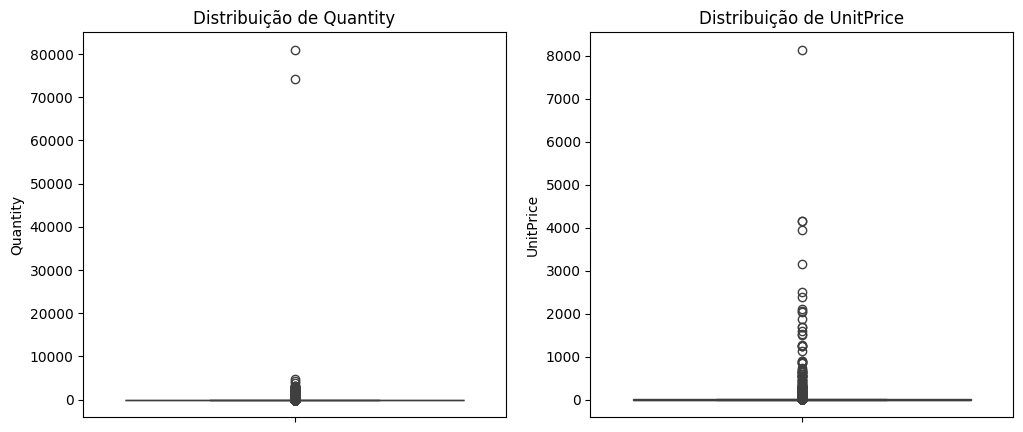

Resumo dos dados após remoção de outliers extremos:
            Quantity                    InvoiceDate      UnitPrice  \
count  392689.000000                         392689  392689.000000   
mean       12.724550  2011-07-10 19:13:27.579534848       3.105194   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max      4800.000000            2011-12-09 12:50:00    4161.060000   
std        43.083696                            NaN      18.055047   

          CustomerID  
count  392689.000000  
mean    15287.846520  
min     12347.000000  
25%     13955.000000  
50%     15150.000000  
75%     16791.000000  
max     18287.000000  
std      1713.538259  


In [87]:
# Visualizar possíveis outliers para `Quantity` e `UnitPrice`
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar distribuições para identificar outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data['Quantity'])
plt.title("Distribuição de Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(data['UnitPrice'])
plt.title("Distribuição de UnitPrice")

plt.show()

# Remover outliers extremos
data = data[(data['Quantity'] <= 10000) & (data['UnitPrice'] <= 5000)]

# Confirmar a remoção dos outliers
print("Resumo dos dados após remoção de outliers extremos:")
print(data.describe())


Etapa 07) Crie uma coluna adicional

In [88]:
# Criar a coluna TotalPrice como o produto de Quantity e UnitPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Exibir as primeiras linhas para confirmar a criação da nova coluna
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Etapa 08) Última data

In [89]:
# Encontrar a data da última compra no dataset
last_purchase_date = data['InvoiceDate'].max()

# Exibir a data da última compra
print("Data da última compra no dataset:", last_purchase_date)


Data da última compra no dataset: 2011-12-09 12:50:00


Etapa 09) Plotando gráficos
•	Top 10 países com maior valor em vendas
•	Top 10 produtos mais vendidos
•	Valor de venda total por mês
•	Valor de venda total por mês e por país (considere apenas os top 10)


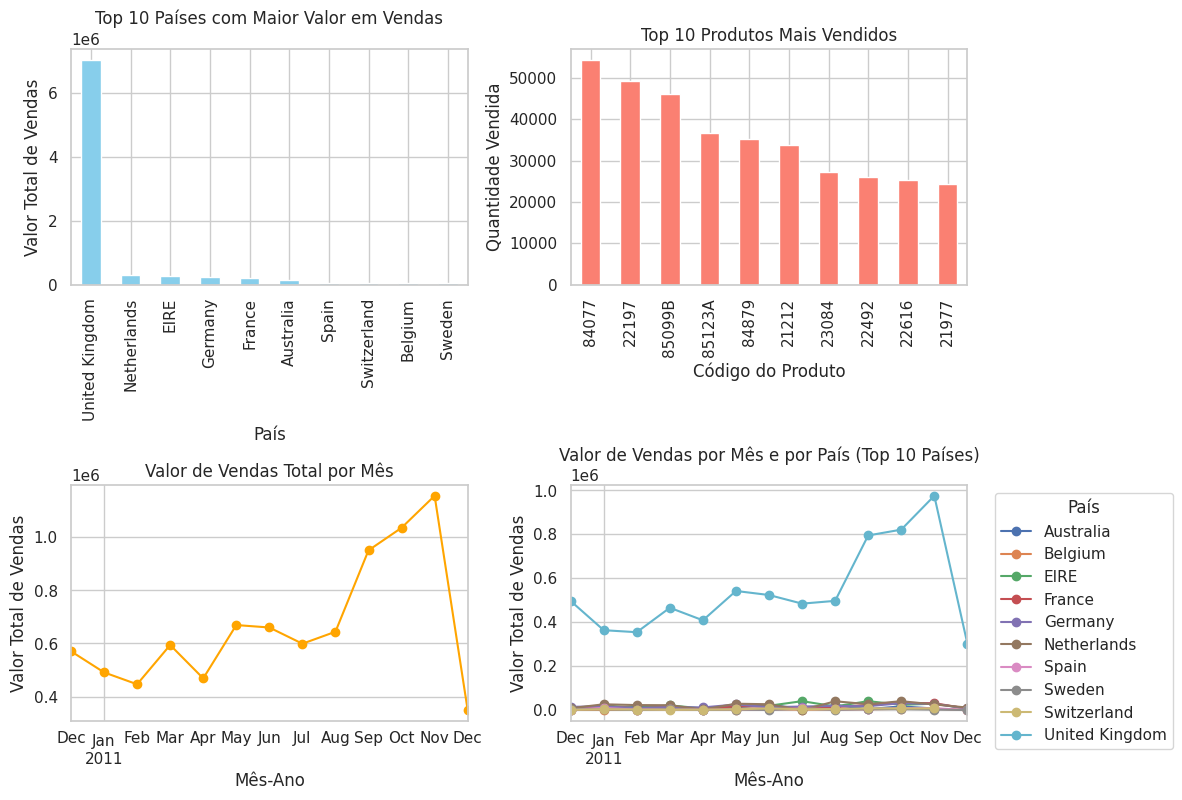

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 1. Top 10 países com maior valor em vendas
top_countries = data.groupby('Country')['TotalPrice'].sum().nlargest(10)
plt.subplot(2, 2, 1)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Países com Maior Valor em Vendas")
plt.xlabel("País")
plt.ylabel("Valor Total de Vendas")

# 2. Top 10 produtos mais vendidos
top_products = data.groupby('StockCode')['Quantity'].sum().nlargest(10)
plt.subplot(2, 2, 2)
top_products.plot(kind='bar', color='salmon')
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Código do Produto")
plt.ylabel("Quantidade Vendida")

# Adicionar uma coluna 'MonthYear' para facilitar as análises temporais
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# 3. Valor de venda total por mês
monthly_sales = data.groupby('MonthYear')['TotalPrice'].sum()
plt.subplot(2, 2, 3)
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Valor de Vendas Total por Mês")
plt.xlabel("Mês-Ano")
plt.ylabel("Valor Total de Vendas")

# 4. Valor de venda total por mês e por país (apenas top 10 países)
top_country_list = top_countries.index  # Lista dos 10 países com maior valor em vendas
monthly_sales_country = data[data['Country'].isin(top_country_list)]
monthly_sales_country = monthly_sales_country.groupby(['MonthYear', 'Country'])['TotalPrice'].sum().unstack()

plt.subplot(2, 2, 4)
monthly_sales_country.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Valor de Vendas por Mês e por País (Top 10 Países)")
plt.xlabel("Mês-Ano")
plt.ylabel("Valor Total de Vendas")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Etapa 10) Cálculo do RFM

In [91]:
import numpy as np

# Passo 1: Agrupar por `CustomerID` e `InvoiceNo` para calcular o valor total de cada pedido
customer_orders = data.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',      # Última data de cada compra (pedido)
    'TotalPrice': 'sum'        # Total de cada pedido
}).reset_index()

# Passo 2: Agrupar por `CustomerID` para calcular as métricas RFM
rfm = customer_orders.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_purchase_date - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',                                        # Frequência (número de pedidos)
    'TotalPrice': 'mean'                                           # Ticket médio (valor médio por pedido)
}).reset_index()

# Renomear as colunas para RFM
rfm.columns = ['CustomerID', 'R', 'F', 'M']

# Exibir as primeiras linhas do dataframe RFM
rfm.head()


,CustomerID,R,F,M
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
